In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar

In [4]:
# ! pip install soccerplots


In [108]:
## load data
df = pd.read_csv('../data/final_per_90_and_pAdj.csv')

In [109]:
df.columns.values

array(['fb_id', 'player_name', 'Squad_from_op', 'Opposing_Poss',
       'Opposing_Touches', 'Player', 'Nation', 'Position',
       'Tackle_pct_won', 'Nineties', 'xA', 'Key_pass', 'Comp_prog',
       'Total_Cmp', 'Total_Att', 'Total_Cmp_pct', 'Total_Tot_Dist',
       'Total_Prg_Dist', 'Short_Cmp', 'Short_Att', 'Short_Cmp_pct',
       'Medium_Cmp', 'Medium_Att', 'Medium_Cmp_pct', 'Long_Cmp',
       'Long_Att', 'Long_Cmp_pct', 'touches', 'touches_def_box',
       'touches_def_3rd', 'touches_mid_3rd', 'touches_att_3rd',
       'touches_att_box', 'touch_live', 'dribble_Succ', 'dribble_Att',
       'dribble_Succ_pct', 'num_dribble_past', 'dribble_megs', 'carries',
       'carries_dist', 'carries_prog_dist', 'carries_prog',
       'carries_att_3rd', 'carries_att_box', 'miss_control', 'dispossed',
       'recep_targ', 'recep_succ', 'recept_pct', 'Fouls_drawn',
       'Offsides', 'Crosses', 'PK_won', 'Aerial_win_pct', 'Gls', 'Sh',
       'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist'

In [106]:
# make df of only key features 
cdf = df[['player_name','Club',
       'Aerial_win_pct',
       'pAdj_Num_Dribblers_tackled',
       'pAdj_Num_Dribbled_past','pAdj_Tackles_and_Ints', 'pAdj_Clearences',
       'pAdj_Fouls','pAdj_Recoveries', 'True_tackle_pct',
       'pAdj_Tackle_int_blocks', 
       'pct_long_balls', 'prog_carry+lng_comp+crosses',
       ]]

In [113]:
df[df['player_name'].str.startswith('Matt')]

,fb_id,player_name,Squad_from_op,Opposing_Poss,Opposing_Touches,Player,Nation,Position,Tackle_pct_won,Nineties,...,pAdj_OG,pAdj_Recoveries,pAdj_Aerial_Duels_lost,lost_tackles,True_tackle_pct,pAdj_Tackle_int_blocks,avg_shrt+med_pass_pct,pct_long_balls,prog_carry+lng_comp+crosses,attacking_touches
264,d1d418f8,Matt Polster,New England,49.1,20024,Matt Polster\d1d418f8,us USA,MF,29.700000,25.3,...,0.0,15.570249,3.624110,1.208037,42.281879,10.469650,92.90,16.818500,13.162055,14.387352
411,8393a973,Matt Besler,Austin FC,46.0,18825,Matt Besler\8393a973,us USA,DF,31.100000,19.4,...,0.0,13.499268,4.189428,0.930984,30.188679,7.075478,94.80,17.634093,14.484536,5.773196
483,5e2a4d0e,Matt Hedges,FC Dallas,48.9,20180,Matt Hedges\5e2a4d0e,us USA,DF,38.700000,16.0,...,0.0,11.688553,4.949207,0.737116,45.238095,8.002973,90.80,23.384254,9.750000,3.812500
509,c9b098db,Matt LaGrassa,Nashville,53.5,21537,Matt LaGrassa\c9b098db,us USA,MF,27.200000,4.1,...,0.0,13.476524,0.000000,2.695305,47.500000,11.166263,85.90,21.084337,8.536585,12.682927
652,2f49476c,Matt Freese,Philadelphia,51.8,20563,Matt Freese\2f49476c,us USA,GK,28.241594,5.6,...,0.0,6.790977,0.000000,0.000000,28.241594,0.000000,95.85,74.436090,7.142857,0.000000
681,4a51ba65,Matt Turner,New England,49.1,20024,Matt Turner\4a51ba65,us USA,GK,25.000000,28.0,...,0.0,7.822756,0.000000,0.000000,25.000000,0.000000,98.65,60.632911,9.392857,0.000000
697,1c2c030a,Matthew Real,Philadelphia,51.8,20563,Matthew Real\1c2c030a,us USA,MF,33.300000,1.7,...,0.0,8.753587,7.780966,0.972621,40.000000,13.616690,75.60,10.169492,4.705882,8.823529


In [114]:


df = cdf.loc[cdf['player_name'].isin(['Nathan Cardoso','Alan Franco','Andreu Fontàs','Andrés Reyes','Matt Besler'])]
df.rename(columns={'pAdj_Tackles_and_Ints':'Tackles_and_Ints','pAdj_Clearences':'Clearences','pAdj_Fouls':'Fouls',
                   'pAdj_Recoveries':'Recoveries',
                  'pAdj_Tackle_int_blocks':'Tackle_int_blocks','pAdj_Num_Dribblers_tackled':'Num_Dribblers_tackled',
                  'pAdj_Num_Dribbled_past':'Num_Dribbled_past'},inplace=True)

params = list(df.columns)[2:]
df

/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,player_name,Club,Aerial_win_pct,Num_Dribblers_tackled,Num_Dribbled_past,Tackles_and_Ints,Clearences,Fouls,Recoveries,True_tackle_pct,Tackle_int_blocks,pct_long_balls,prog_carry+lng_comp+crosses
316,Andreu Fontàs,NaN,54.3,1.415684,1.625414,5.924898,9.070861,1.205953,15.939548,42.016807,7.393014,23.514584,22.636364
353,Alan Franco,Atlanta United,72.4,1.565788,1.478799,11.134490,7.741950,3.392540,18.702464,43.220339,13.570160,23.076923,12.544643
411,Matt Besler,Austin FC,65.2,0.651689,1.396476,4.841117,10.427020,1.117181,13.499268,30.188679,7.075478,17.634093,14.484536
417,Andrés Reyes,NaN,71.3,1.949629,1.516378,9.206584,10.289711,4.224197,19.604607,36.274510,9.964773,27.821940,7.070064
455,Nathan Cardoso,San Jose Earthquakes,73.6,3.609874,3.989861,16.719418,9.974653,4.084858,15.294467,44.897959,18.429358,26.518219,12.708333


In [115]:
ranges = []
a_values = []
b_values = []
c_values = []

# create ranges for each player
for x in params:
    a = min(df[params][x])
    a = a - (a*.15)
    
    b = max(df[params][x])
    b = b + (b*.15)
    
#     c = min(df[params][x])
#     c = c - (c*0.15)
    
    ranges.append((a,b,))
#                    c))
    
for x in range(len(df['player_name'])):
#     if df['player_name'].iloc[x] == 'Nathan Cardoso':
#         a_values = df.iloc[x].values.tolist()

#     if df['player_name'].iloc[x] == 'Andrés Reyes':
#         b_values = df.iloc[x].values.tolist()
        
        
    if df['player_name'].iloc[x] == 'Andreu Fontàs':
        a_values = df.iloc[x].values.tolist()
        
    if df['player_name'].iloc[x] == 'Matt Besler':
        b_values = df.iloc[x].values.tolist()


#remove names and club from values 
a_values = a_values[2:]
b_values = b_values[2:]
# c_values = c_values[2:]


values = [a_values,b_values]
#           c_values]
values

[[54.3,
  1.415683553088133,
  1.6254144498419307,
  5.92489783329478,
  9.07086128460174,
  1.2059526563343357,
  15.939548153288612,
  42.01680672268908,
  7.393014110571363,
  23.51458408354339,
  22.63636363636364],
 [65.2,
  0.6516887775359047,
  1.3964759518626526,
  4.841116633123863,
  10.427020440574475,
  1.117180761490122,
  13.49926753467231,
  30.18867924528302,
  7.075478156104107,
  17.63409257898604,
  14.484536082474229]]

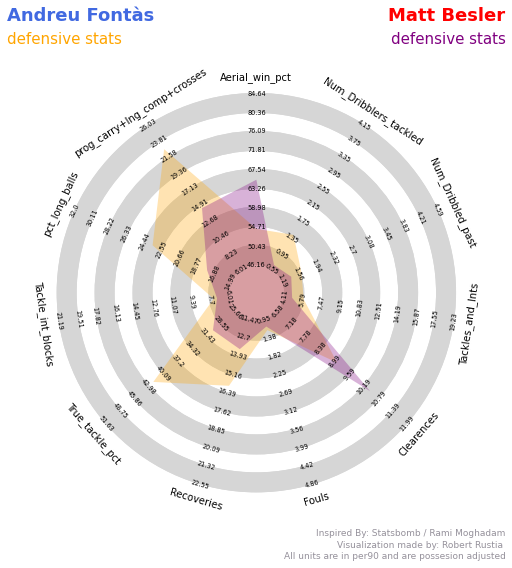

In [118]:
title = dict(
    title_name='Andreu Fontàs',
    title_color = 'royalblue',
    subtitle_name = 'defensive stats',
    subtitle_color = 'orange',
    title_name_2='Matt Besler',
    title_color_2 = 'red',
    subtitle_name_2 = 'defensive stats',
    subtitle_color_2 = 'purple',
    title_fontsize = 18,
    subtitle_fontsize=8
)

## endnote 
endnote = "Visualization made by: Robert Rustia \nAll units are in per90 and are possesion adjusted"

radar = Radar()

fig,ax = radar.plot_radar(ranges=ranges,params=params,values=values,
                         radar_color=['orange','purple'],
                         alphas=[0.3,0.3],
                         title=title,
                         figsize = (20, 20),
                         compare=True,
endnote = endnote
)

In [119]:
ranges = []
a_values = []
b_values = []
c_values = []

# create ranges for each player
for x in params:
    a = min(df[params][x])
    a = a - (a*.15)
    
    b = max(df[params][x])
    b = b + (b*.15)
    
#     c = min(df[params][x])
#     c = c - (c*0.15)
    
    ranges.append((a,b,))
#                    c))
    
for x in range(len(df['player_name'])):
    if df['player_name'].iloc[x] == 'Nathan Cardoso':
        a_values = df.iloc[x].values.tolist()

    if df['player_name'].iloc[x] == 'Andrés Reyes':
        b_values = df.iloc[x].values.tolist()


#remove names and club from values 
a_values = a_values[2:]
b_values = b_values[2:]


values = [a_values,b_values]


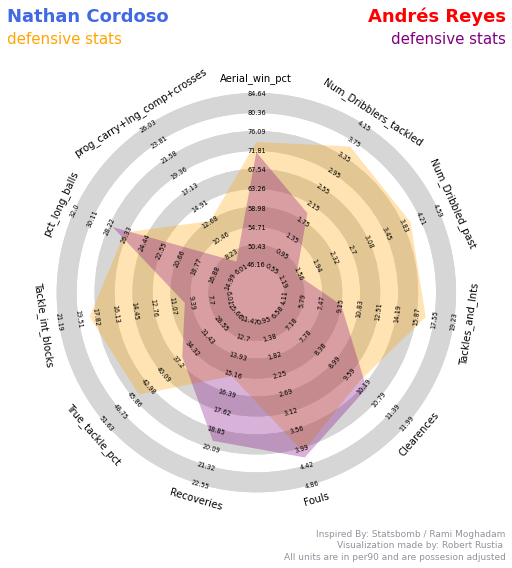

In [120]:
title = dict(
    title_name='Nathan Cordoso',
    title_color = 'royalblue',
    subtitle_name = 'defensive stats',
    subtitle_color = 'orange',
    title_name_2='Andrés Reyes',
    title_color_2 = 'red',
    subtitle_name_2 = 'defensive stats',
    subtitle_color_2 = 'purple',
    title_fontsize = 18,
    subtitle_fontsize=8
)

## endnote 
endnote = "Visualization made by: Robert Rustia \nAll units are in per90 and are possesion adjusted"

radar = Radar()

fig,ax = radar.plot_radar(ranges=ranges,params=params,values=values,
                         radar_color=['orange','purple'],
                         alphas=[0.3,0.3],
                         title=title,
                         figsize = (20, 20),
                         compare=True,
endnote = endnote
)